In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import koreanize_matplotlib
from scipy import stats
from numpy import expm1

from IPython.display import set_matplotlib_formats
pd.options.display.max_columns= 100

sns.set(font='AppleGothic', rc={'axes.unicode_minus':False})
plt.rc('font', family= 'AppleGothic')
plt.rc('axes', unicode_minus=False)
mpl.rcParams['axes.unicode_minus'] = False
set_matplotlib_formats('retina')

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_62266/2963846445.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
data = pd.read_csv('../../data/house_price/train.csv')
test = pd.read_csv('../../data/house_price/test.csv')

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
data.shape

(1460, 81)

In [5]:
all_nan_columns = data.columns[data.isna().all()].tolist()
print(f"모든 값이 NaN인 컬럼 개수: {len(all_nan_columns)}")

data.drop(columns=all_nan_columns, inplace=True, axis=1)
test.drop(columns=all_nan_columns, inplace=True, axis=1)

모든 값이 NaN인 컬럼 개수: 0


In [6]:
unique_one_columns = [col for col in data.columns if data[col].nunique() == 1]
print(f'고유값이 1인 컬럼 개수: {len(unique_one_columns)}')

data.drop(columns=unique_one_columns, inplace=True, axis=1)
test.drop(columns=unique_one_columns, inplace=True, axis=1)

고유값이 1인 컬럼 개수: 0


In [7]:
duplicate_all = data[data.drop(columns=['SalePrice']).duplicated(keep=False)]
duplicate_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [9]:
data.isnull().sum().sort_values(ascending=False)[:21]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
dtype: int64

<Axes: >

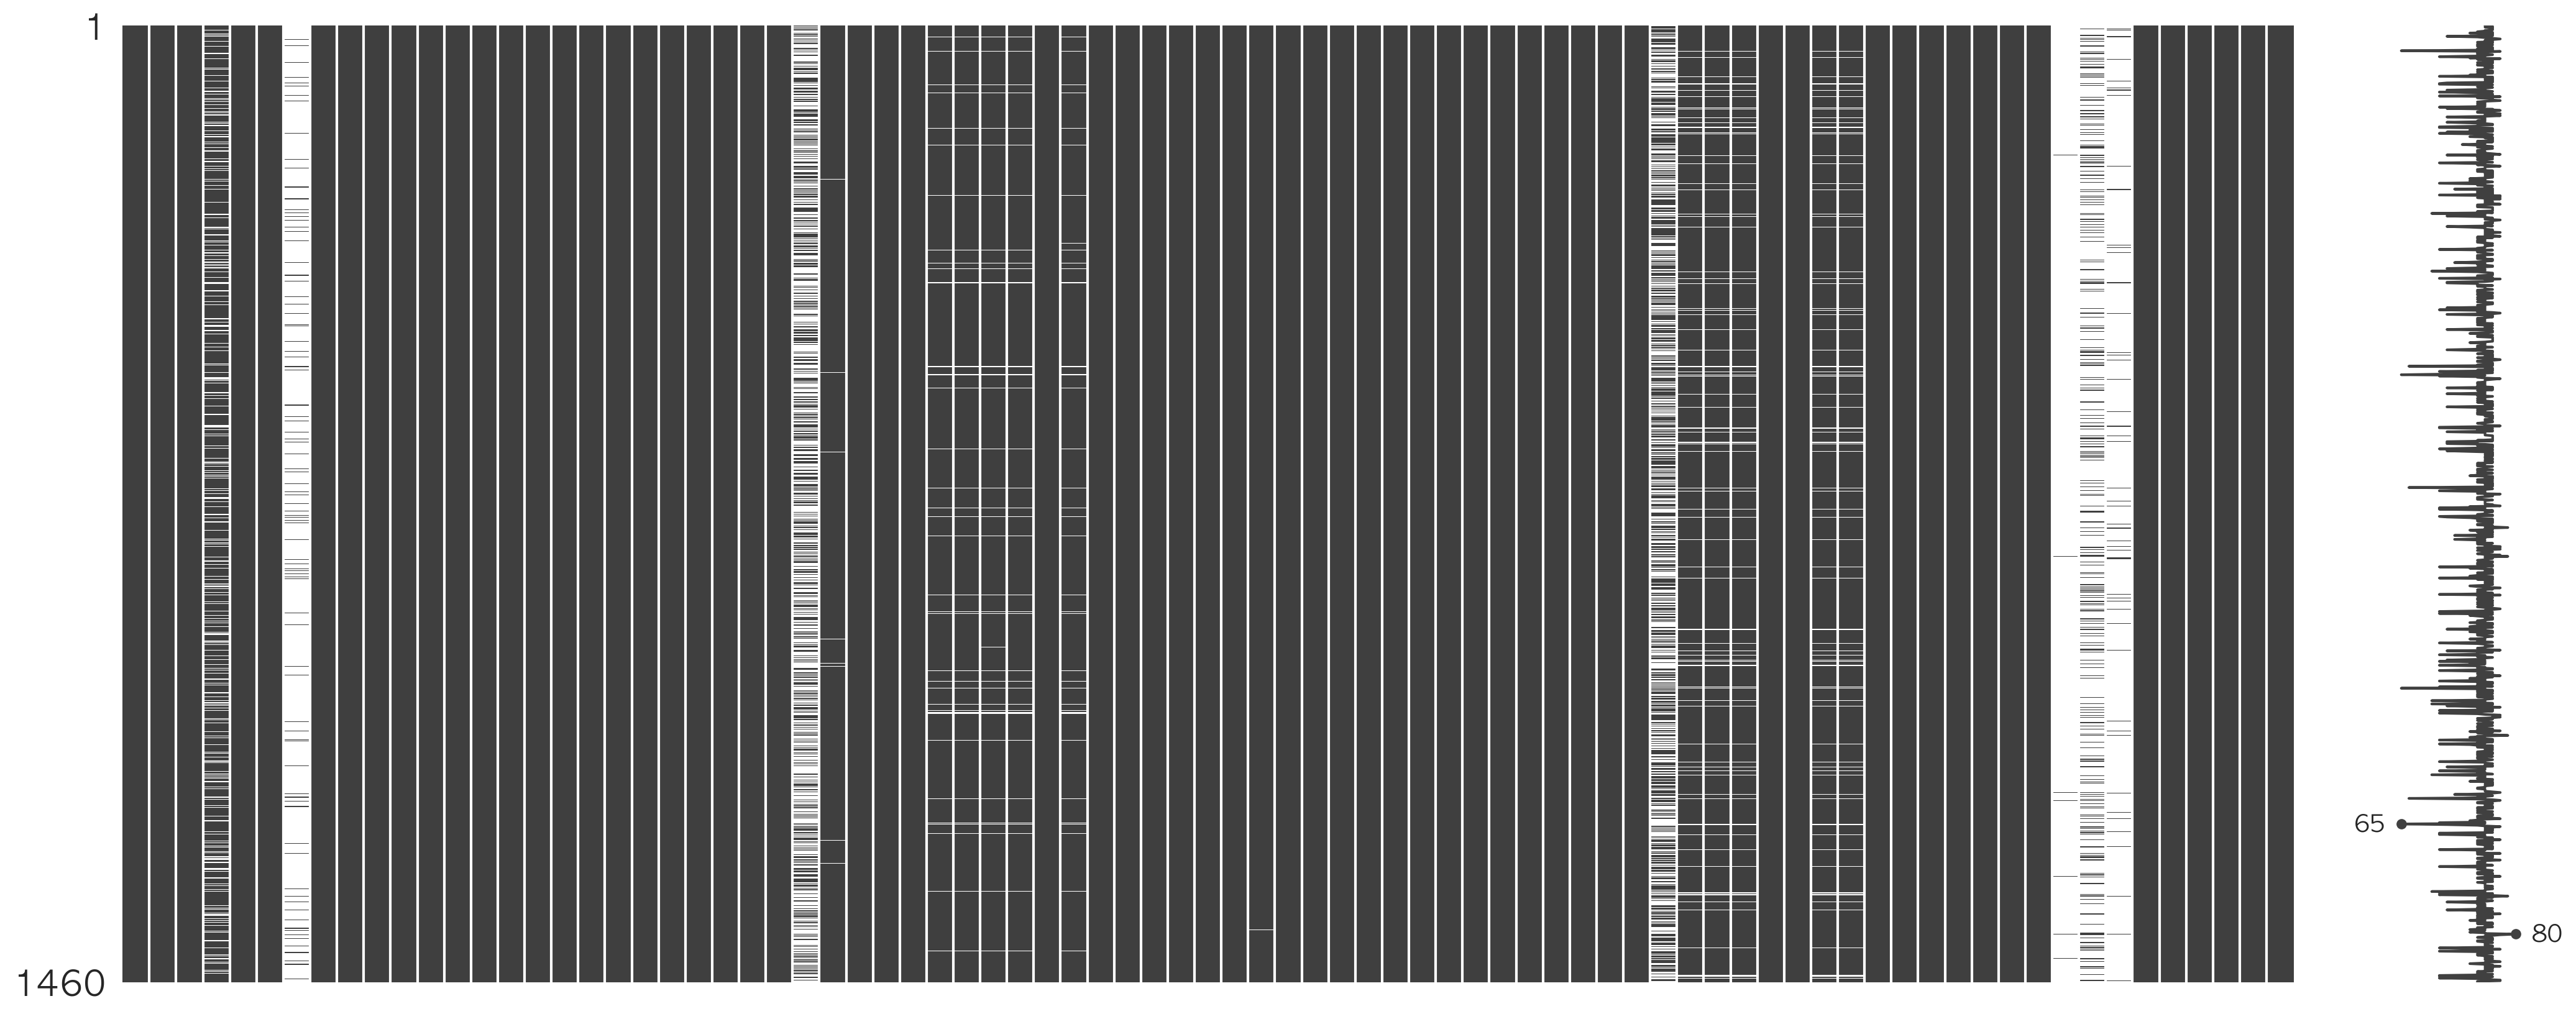

In [10]:
import missingno

missingno.matrix(data)

In [11]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [12]:
log_data = data.copy()

log_data['SalePrice'] = np.log1p(log_data["SalePrice"])

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_62266/3349814734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"], ax=axes[0][0])
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_62266/3349814734.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log

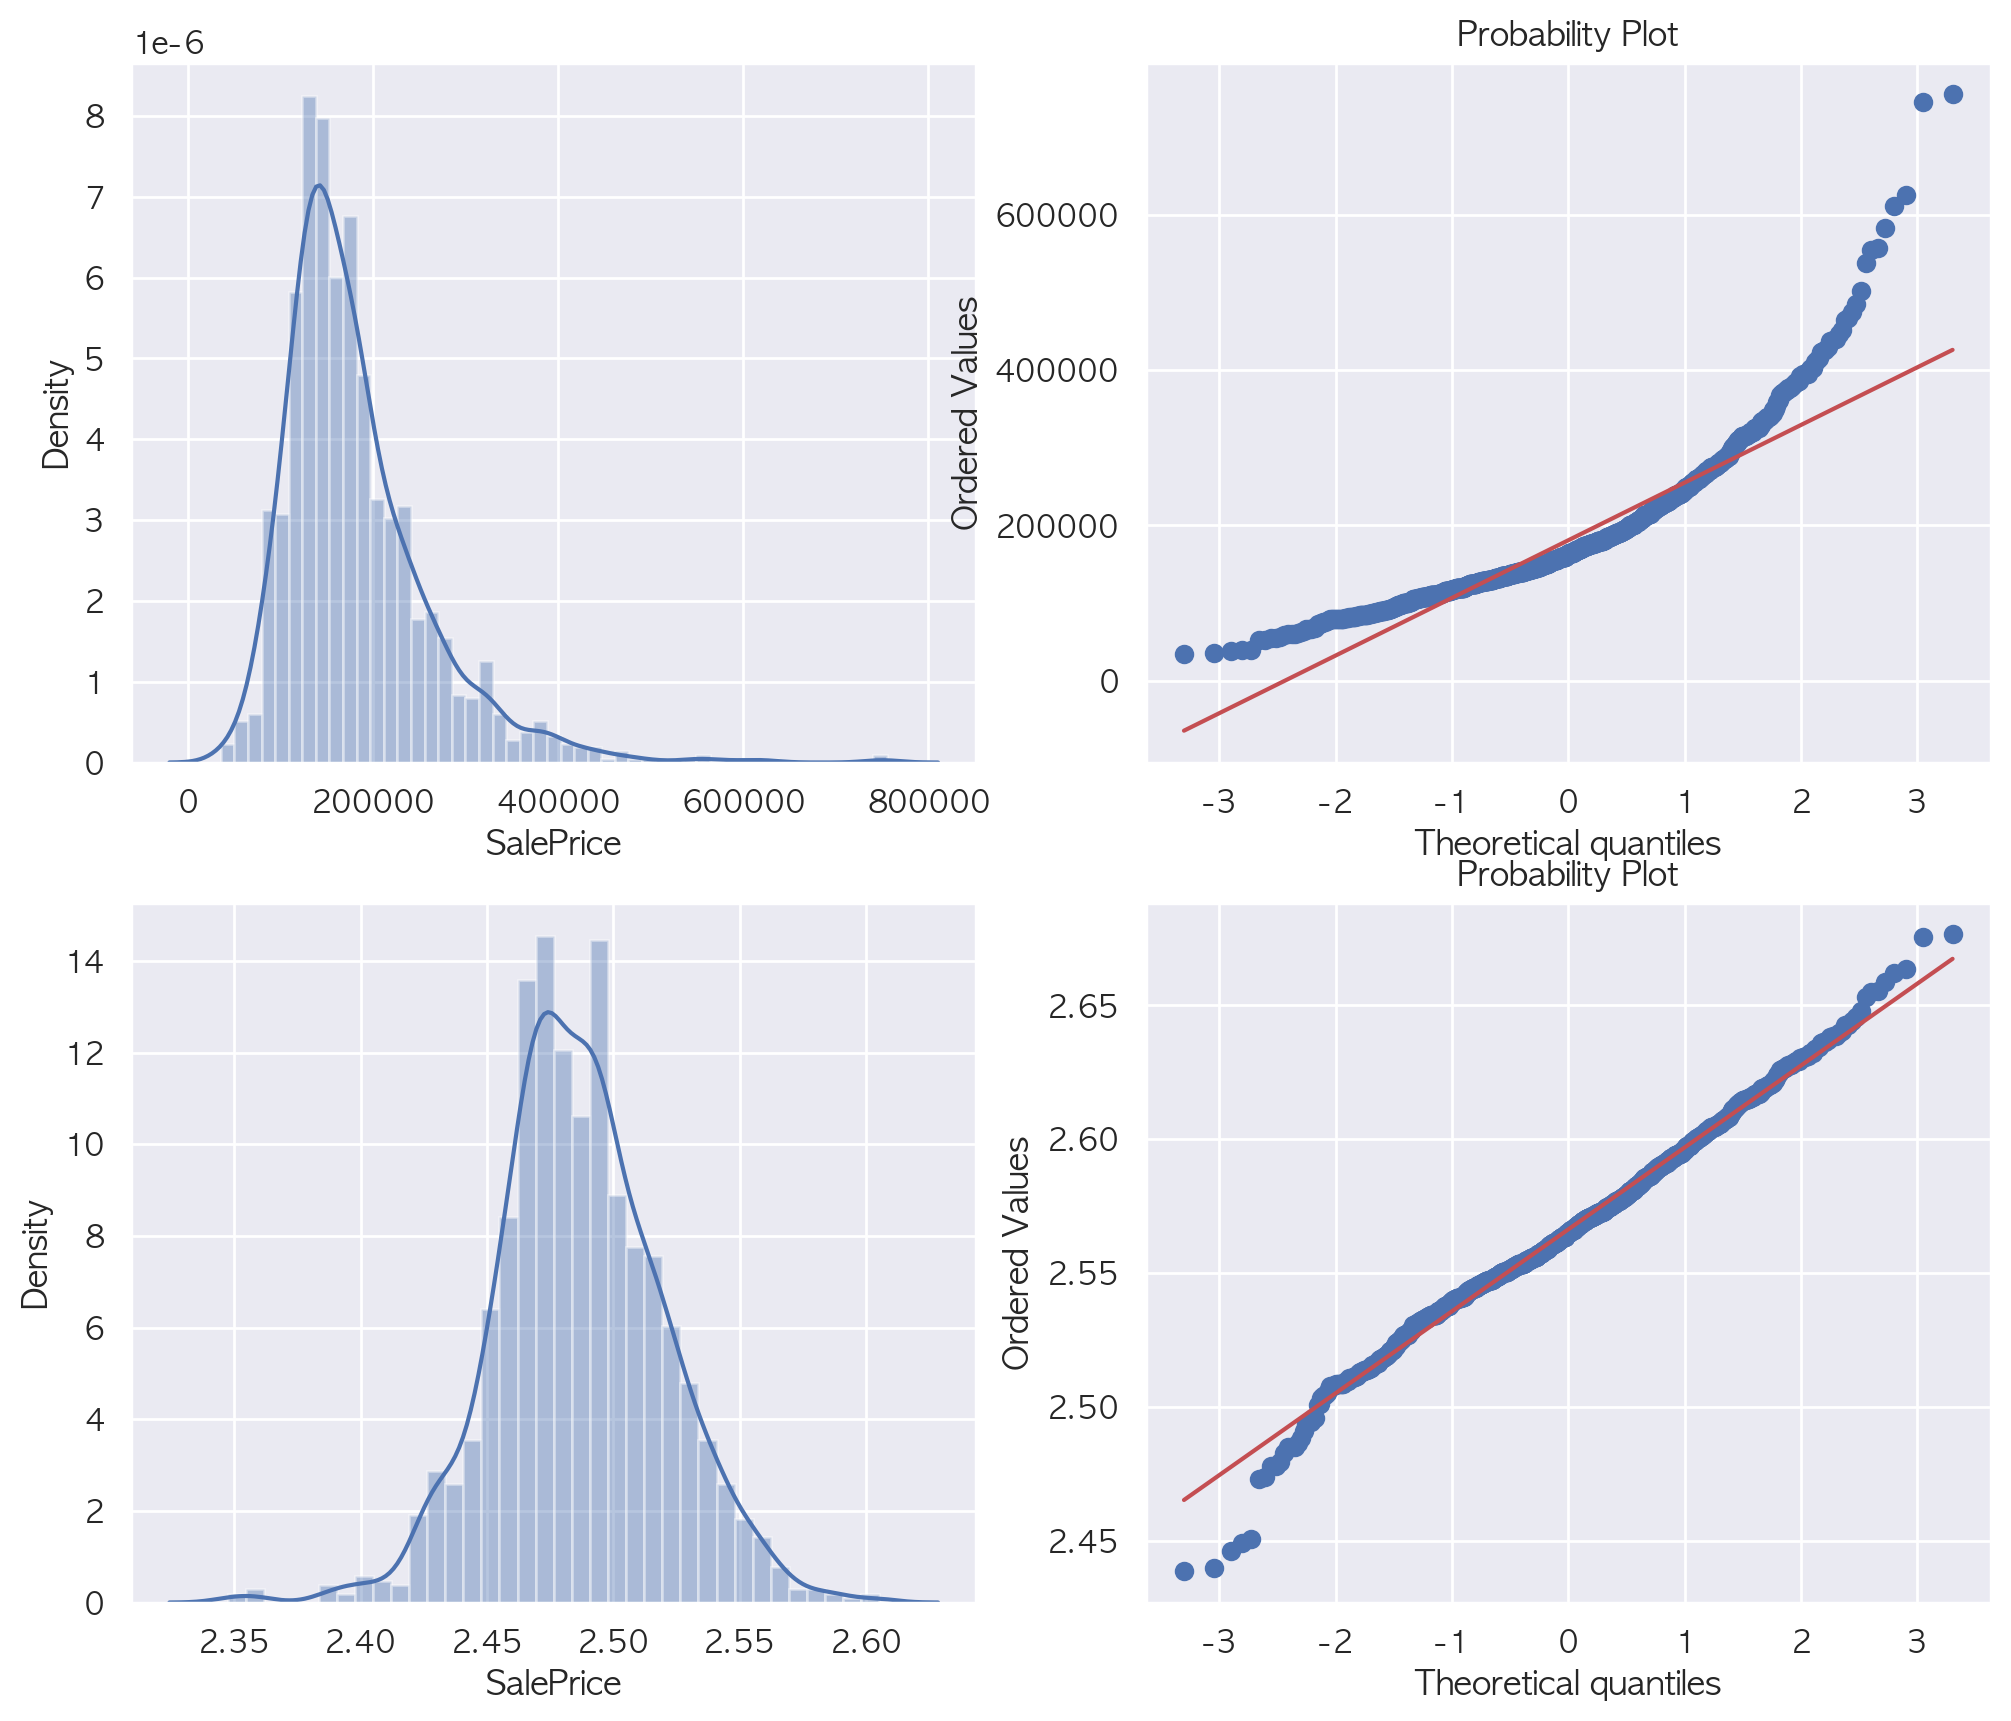

In [13]:
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(data["SalePrice"], ax=axes[0][0])
stats.probplot(data["SalePrice"], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(np.log(log_data["SalePrice"]), ax=axes[1][0])
stats.probplot(np.log1p(log_data["SalePrice"]), dist='norm', fit=True, plot=axes[1][1])

plt.savefig("plot_results.png")

# 그래프 표시 (필요에 따라 표시 생략 가능)
plt.show()

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # numeric_dtypes 설정
# numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numeric = []

# # 숫자형 컬럼 확인 및 필터링
# for i in data.columns:
#     if data[i].dtype in numeric_dtypes:
#         if i in ['TotalSF', 'Total_Bathrooms','Total_porch_sf','haspool','hasgarage','hasbsmt','hasfireplace']:
#             pass
#         else:
#             numeric.append(i)     

# # 행과 열 설정 (3열로 그래프 배치)
# fig, axs = plt.subplots(ncols=3, nrows=(len(numeric) // 3 + 1), figsize=(18, len(numeric) * 2))

# # 그래프 간격 조정
# plt.subplots_adjust(hspace=0.5, wspace=0.3)

# # 팔레트 설정
# sns.color_palette("husl", 8)

# # 각각의 numeric 컬럼에 대해 그래프 그리기
# for i, feature in enumerate(numeric):
#     row = i // 3
#     col = i % 3
    
#     sns.scatterplot(x=feature, y='SalePrice', data=data, ax=axs[row][col])
    
#     axs[row][col].set_xlabel(feature, fontsize=12)
#     axs[row][col].set_ylabel('SalePrice', fontsize=12)
#     axs[row][col].tick_params(axis='x', labelsize=10)
#     axs[row][col].tick_params(axis='y', labelsize=10)

# plt.tight_layout()
# plt.savefig('scatterplot_grid.png', dpi=300, bbox_inches='tight')

# plt.show()

In [15]:
# category_df = data.select_dtypes(include=['int', 'float']).columns
# # category_columns = category_df.tolist()

# corr = data[category_df].corr()
# plt.subplots(figsize=(20,15))
# sns.heatmap(corr, annot=True, cmap="Blues", square=True, fmt=".1f")

# plt.savefig('heatmap_correlation.png', dpi=300, bbox_inches='tight')
# plt.show()

In [16]:
train = data.copy()

In [17]:
train.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [18]:
# Fence 울타리 -> nan = 없음
train['Fence']= train['Fence'].fillna('No')
train['Fence'].unique()

# PoolQC = 수영장의 품질 -> nan = 없음
train['PoolQC']= train['PoolQC'].fillna('No')
train['PoolQC'].unique()

# MiscFeature = 주택의 기타 부가적인 특징 -> nan = 없음
train['MiscFeature']= train['MiscFeature'].fillna('No')
train['MiscFeature'].unique()

# Alley 주택이 뒷골목에 접하는지 여부 -> nan = 뒷골목이 없다.
train['Alley']= train['Alley'].fillna('No')
train['Alley'].unique()

# MasVnrType = 주택의 외부 벽에 사용된 벽돌 베니어(장식용 외벽)의 유형 -> nan = 주택 외부에 추가적인 벽돌 마감이 없는 경우
train['MasVnrType']= train['MasVnrType'].fillna('No')
train['MasVnrType'].unique()

# FireplaceQu = 화재 대피 장소 -> nan = 없음
train['FireplaceQu']= train['FireplaceQu'].fillna('No')
train['FireplaceQu'].unique()

array(['No', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

## 차고
> - GarageYrBlt       81
> - GarageCond        81
> - GarageType        81
> - GarageFinish      81
> - GarageQual        81

In [19]:
# GarageFinish = 차고 내부 마감 상태 -> nan = 차고 없음
train['GarageFinish']= train['GarageFinish'].fillna('No')
train['GarageFinish'].unique()

# GarageType = 차고 위치 -> nan = 차고 없음
train['GarageType']= train['GarageType'].fillna('No')
train['GarageType'].unique()

# GarageQual: 차고의 품질 -> nan = 차고 없음
train['GarageQual']= train['GarageQual'].fillna('No')
train['GarageQual'].unique()

# GarageCond: 차고의 상태 -> nan = 차고 없음
train['GarageCond']= train['GarageCond'].fillna('No')
train['GarageCond'].unique()

# GarageYrBlt: 차고가 건설된 연도 -> nan = 차고 없음
train['GarageYrBlt']= train['GarageYrBlt'].fillna('No')
train['GarageYrBlt'].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, 'No',
       1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0,
       1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0,
       1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0,
       1969.0, 1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0,
       1986.0, 1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0,
       1996.0, 1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0,
       1925.0, 1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0,
       1952.0, 1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0,
       1929.0, 1933.0], dtype=object)

In [20]:
condition = (
    (train['GarageFinish'] == 'No') &
    (train['GarageType'] == 'No') &
    (train['GarageQual'] == 'No') &
    (train['GarageCond'] == 'No') &
    (train['GarageYrBlt'] == 'No')
)

train.loc[condition, 'GarageArea'] = 0 # Size of garage in square feet
train.loc[condition, 'GarageCars'] = 0 # Size of garage in car capacity

In [21]:
# train['GarageArea'].fillna(train.groupby('GarageType')['GarageArea'].transform('median'), inplace=True)
# train['GarageCars'].fillna(train.groupby('GarageType')['GarageCars'].transform('median'), inplace=True)

In [22]:
garage_columns = ['GarageFinish', 'GarageType', 'GarageQual', 'GarageCond', 'GarageYrBlt']

# 하나라도 'No'인 경우
no_garage_condition = (train[garage_columns] == 'No').any(axis=1)
# 모든 컬럼이 'No'인 경우
all_no_condition = (train[garage_columns] == 'No').all(axis=1)
# 'No' 값이 하나라도 포함된 행 중에서 모든 컬럼이 'No'인지 확인한 결과
matching_rows = train[no_garage_condition & all_no_condition]

matching_rows[garage_columns] # 차고가 없을 때 다른 것도 차고가 없음

,GarageFinish,GarageType,GarageQual,GarageCond,GarageYrBlt
39,No,No,No,No,No
48,No,No,No,No,No
78,No,No,No,No,No
88,No,No,No,No,No
89,No,No,No,No,No
...,...,...,...,...,...
1349,No,No,No,No,No
1407,No,No,No,No,No
1449,No,No,No,No,No
1450,No,No,No,No,No


In [23]:
garage_columns = ['GarageCars', 'GarageArea']


one_zero_condition = (train[garage_columns] == 0).any(axis=1)
both_zero_condition = (train[garage_columns] == 0).all(axis=1)
matching_rows = train[one_zero_condition & both_zero_condition]

matching_rows[garage_columns] # 차고가 없을 때 나머지 차고 관련 컬럼도 0

,GarageCars,GarageArea
39,0,0
48,0,0
78,0,0
88,0,0
89,0,0
...,...,...
1349,0,0
1407,0,0
1449,0,0
1450,0,0


## 지하실
> - BsmtFinType2      38
> - BsmtExposure      38
> - BsmtQual          37
> - BsmtCond          37
> - BsmtFinType1      37

In [24]:
# BsmtFinType1: 지하실 마감 영역 평가-> nan = 지하실 없음
train['BsmtFinType1']= train['BsmtFinType1'].fillna('No')
train['BsmtFinType1'].unique()

# BsmtFinType2: 지하실의 두 번째 마감 유형 평가 -> nan = 지하실 없음
train['BsmtFinType2']= train['BsmtFinType2'].fillna('No')
train['BsmtFinType2'].unique()

# BsmtExposure: 지하실의 노출 상태 -> nan = 지하실 없음
train['BsmtExposure']= train['BsmtExposure'].fillna('No')
train['BsmtExposure'].unique()

# BsmtCond: 지하실의 전반적인 상태 평가 -> nan = 지하실 없음
train['BsmtCond']= train['BsmtCond'].fillna('No')
train['BsmtCond'].unique()

# BsmtQual: 지하실의 높이를 평가 -> nan = 지하실 없음
train['BsmtQual']= train['BsmtQual'].fillna('No')
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'No', 'Fa'], dtype=object)

In [25]:
condition = (
    (train['BsmtFinType2'] == 'No') &
    (train['BsmtExposure'] == 'No') &
    (train['BsmtQual'] == 'No') &
    (train['BsmtCond'] == 'No') &
    (train['BsmtFinType1'] == 'No')
)

train.loc[condition, 'BsmtFullBath'] = 0
train.loc[condition, 'BsmtHalfBath'] = 0
train.loc[condition, 'BsmtFinSF1'] = 0
train.loc[condition, 'BsmtFinSF2'] = 0
train.loc[condition, 'BsmtUnfSF'] = 0
train.loc[condition, 'TotalBsmtSF'] = 0

In [26]:
Bs_columns = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual']

no_Bs_condition = (train[Bs_columns] == 'No').any(axis=1)
all_no_Bs_condition = (train[Bs_columns] == 'No').all(axis=1)
matching_Bs_rows = train[no_Bs_condition & all_no_Bs_condition]

print(len(matching_Bs_rows[Bs_columns])) # 지하실 없을 때 다른 것도 지하실 없음
matching_Bs_rows[Bs_columns]

# BsmtFinType2 38 / BsmtExposure 38은 38개 행이 nan -> 확인 필요

37


,BsmtFinType1,BsmtFinType2,BsmtExposure,BsmtCond,BsmtQual
17,No,No,No,No,No
39,No,No,No,No,No
90,No,No,No,No,No
102,No,No,No,No,No
156,No,No,No,No,No
182,No,No,No,No,No
259,No,No,No,No,No
342,No,No,No,No,No
362,No,No,No,No,No
371,No,No,No,No,No


In [27]:
# 예외
exception_Bs_columns = ['BsmtFinType1', 'BsmtFinType2']

exception_Bs_condition = (train[exception_Bs_columns] == 'No').any(axis=1)
print(len(train[exception_Bs_condition]))
train[exception_Bs_condition]

# 332행 ->  BsmtFinType2 / BsmtExposure이 No인데 다른 행은 값이 있다. -> 매꿔야 한다.
# Gd	TA	No	GLQ	1124	No	479	1603	3206	

38


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,Slab,No,No,No,No,0,No,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,No,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,No,No,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,No,0.0,TA,TA,PConc,No,No,No,No,0,No,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No,No,No,No,0,0,No,No,N,0,0,0,0,0,0,No,No,No,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,No,0.0,TA,TA,Slab,No,No,No,No,0,No,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,No,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,No,No,No,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,No,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,No,0.0,TA,Fa,Slab,No,No,No,No,0,No,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,No,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,No,0.0,TA,TA,CBlock,No,No,No,No,0,No,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,No,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,No,No,No,No,0,No,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,No,MnPrv,No,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,No,0.0,TA,TA,PConc,No,No,No,No,0,No,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,No,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,No,No,No,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,No,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,10,2009,WD,Normal,284000
342,343,90,RL,NaN,8544,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,No,No,No,No,0,No,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,No,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,No,No,No,No,0,No,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,No,No,No,0,7,2009,ConLD,Normal,198500


In [28]:
# Exterior1st, 2nd는 집의 외관을 덮고 있는 외장 재료를 나타내는 변수
train['Exterior1st']= train['Exterior1st'].fillna('No') # other
train['Exterior1st'].unique()

train['Exterior2nd']= train['Exterior2nd'].fillna('No') # other
train['Exterior2nd'].unique()

# KitchenQual은 주방의 품질을 평가하는 변수
train['KitchenQual']= train['KitchenQual'].fillna('TA') # 보통
train['KitchenQual'].unique()

# SaleType는 주택 매각 시 사용된 판매 방식 또는 거래 유형
train['SaleType']= train['SaleType'].fillna('WD') # 보통
train['SaleType'].unique()

# Utilities는 주택에서 사용 가능한 기반 시설(유틸리티)의 종류를 나타내는 변수
train['Utilities']= train['Utilities'].fillna(test['Utilities'].mode()[0]) # 빈도 수가 가장 많은 것
train['Utilities'].unique()

# Functional는 주택의 기능적 상태를 나타내며, 일반적인 사용 가능 상태부터 주요 결함이나 손상까지 다양한 상태를 평가하는 변수
train['Functional']= train['Functional'].fillna('Typ') # 보통
train['Functional'].unique()

# MSZoning은 주택이 속한 토지의 용도 구역을 나타내는 변수
train['MSZoning']= train['MSZoning'].fillna(test['MSZoning'].mode()[0]) # 빈도 수가 가장 많은 것
train['MSZoning'].unique()

# 나머지
# train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
# train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
# train["MasVnrType"] = train["MasVnrType"].fillna("No") # 외장재의 종류
# # train["MasVnrArea"] = train["MasVnrArea"].fillna(0) # 건물 외부에 벽돌 또는 돌로 장식된 외장재의 면적

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [29]:
# train = data.drop([''], axis=1)
train.isnull().sum().sort_values(ascending=False)[:15]

LotFrontage     259
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
GarageYrBlt       0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
Id                0
GarageFinish      0
HalfBath          0
FullBath          0
dtype: int64

# test에 적용

In [30]:
test.isnull().sum().sort_values(ascending=False)[:25]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
dtype: int64

In [31]:
# Fence 울타리 -> nan = 없음
test['Fence']= test['Fence'].fillna('No')
test['Fence'].unique()

# PoolQC = 수영장의 품질 -> nan = 없음
test['PoolQC']= test['PoolQC'].fillna('No')
test['PoolQC'].unique()

# MiscFeature = 수주택의 기타 부가적인 특징 -> nan = 없음
test['MiscFeature']= test['MiscFeature'].fillna('No')
test['MiscFeature'].unique()

# Alley 주택이 뒷골목에 접하는지 여부 -> nan = 뒷골목이 없다.
test['Alley']= test['Alley'].fillna('No')
test['Alley'].unique()

# MasVnrType = 주택의 외부 벽에 사용된 벽돌 베니어(장식용 외벽)의 유형 -> nan = 주택 외부에 추가적인 벽돌 마감이 없는 경우
test['MasVnrType']= test['MasVnrType'].fillna('No')
test['MasVnrType'].unique()

# FireplaceQu = 화재 대피 장소 -> nan = 없음
test['FireplaceQu']= test['FireplaceQu'].fillna('No')
test['FireplaceQu'].unique()

array(['No', 'TA', 'Gd', 'Po', 'Fa', 'Ex'], dtype=object)

In [32]:
# GarageFinish = 차고 내부 마감 상태 -> nan = 차고 없음
test['GarageFinish']= test['GarageFinish'].fillna('No')
test['GarageFinish'].unique()

# GarageType = 차고 위치 -> nan = 차고 없음
test['GarageType']= test['GarageType'].fillna('No')
test['GarageType'].unique()

# GarageQual: 차고의 품질 -> nan = 차고 없음
test['GarageQual']= test['GarageQual'].fillna('No')
test['GarageQual'].unique()

# GarageCond: 차고의 상태 -> nan = 차고 없음
test['GarageCond']= test['GarageCond'].fillna('No')
test['GarageCond'].unique()

# GarageYrBlt: 차고가 건설된 연도 -> nan = 차고 없음
test['GarageYrBlt']= test['GarageYrBlt'].fillna('No')
test['GarageYrBlt'].unique()


condition = (
    (test['GarageFinish'] == 'No') &
    (test['GarageType'] == 'No') &
    (test['GarageQual'] == 'No') &
    (test['GarageCond'] == 'No') &
    (test['GarageYrBlt'] == 'No')
)

test.loc[condition, 'GarageArea'] = 0 # Size of garage in square feet
test.loc[condition, 'GarageCars'] = 0 # Size of garage in car capacity

# 나머지 것에 대해서는 평균값
test['GarageArea'].fillna(test.groupby('GarageType')['GarageArea'].transform('median'), inplace=True)
test['GarageCars'].fillna(test.groupby('GarageType')['GarageCars'].transform('median'), inplace=True)

In [33]:
# BsmtFinType1: 지하실 마감 영역 평가-> nan = 지하실 없음
test['BsmtFinType1']= test['BsmtFinType1'].fillna('No')
test['BsmtFinType1'].unique()

# BsmtFinType2: 지하실의 두 번째 마감 유형 평가 -> nan = 지하실 없음
test['BsmtFinType2']= test['BsmtFinType2'].fillna('No')
test['BsmtFinType2'].unique()

# BsmtExposure: 지하실의 노출 상태 -> nan = 지하실 없음
test['BsmtExposure']= test['BsmtExposure'].fillna('No')
test['BsmtExposure'].unique()

# BsmtCond: 지하실의 전반적인 상태 평가 -> nan = 지하실 없음
test['BsmtCond']= test['BsmtCond'].fillna('No')
test['BsmtCond'].unique()

# BsmtQual: 지하실의 높이를 평가 -> nan = 지하실 없음
test['BsmtQual']= test['BsmtQual'].fillna('No')
test['BsmtQual'].unique()

# 지하실이 없으면 전부 0
condition = (
    (test['BsmtFinType2'] == 'No') &
    (test['BsmtExposure'] == 'No') &
    (test['BsmtQual'] == 'No') &
    (test['BsmtCond'] == 'No') &
    (test['BsmtFinType1'] == 'No')
)

test.loc[condition, 'BsmtFullBath'] = 0 # 집의 지하에 있는 욕실의 수
test.loc[condition, 'BsmtHalfBath'] = 0 # 집의 지하에 있는 욕실의 수
test.loc[condition, 'BsmtFinSF1'] = 0 # 지하실에서 마감된 첫 번째 유형의 면적
test.loc[condition, 'BsmtFinSF2'] = 0 # 지하실에서 마감된 두 번째 유형의 면적
test.loc[condition, 'BsmtUnfSF'] = 0 # 마감되지 않은 지하실 면적(
test.loc[condition, 'TotalBsmtSF'] = 0 # 지하실의 전체 면적

In [34]:
# Exterior1st, 2nd는 집의 외관을 덮고 있는 외장 재료를 나타내는 변수
test['Exterior1st']= test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior1st'].unique()

test['Exterior2nd']= test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['Exterior2nd'].unique()

# KitchenQual은 주방의 품질을 평가하는 변수
test['KitchenQual']= test['KitchenQual'].fillna('TA')
test['KitchenQual'].unique()

# SaleType는 주택 매각 시 사용된 판매 방식 또는 거래 유형
test['SaleType']= test['SaleType'].fillna(test['SaleType'].mode()[0])
test['SaleType'].unique()

# Utilities는 주택에서 사용 가능한 기반 시설(유틸리티)의 종류를 나타내는 변수
test['Utilities']= test['Utilities'].fillna(test['Utilities'].mode()[0]) # 빈도 수가 가장 많은 것
test['Utilities'].unique()

# Functional는 주택의 기능적 상태를 나타내며, 일반적인 사용 가능 상태부터 주요 결함이나 손상까지 다양한 상태를 평가하는 변수
test['Functional']= test['Functional'].fillna('Typ') # 보통
test['Functional'].unique()

# MSZoning은 주택이 속한 토지의 용도 구역을 나타내는 변수
test['MSZoning']= test['MSZoning'].fillna(test['MSZoning'].mode()[0]) # 빈도 수가 가장 많은 것
test['MSZoning'].unique()

# test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])
# test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
# test["MasVnrType"] = test["MasVnrType"].fillna("No")
# test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [35]:
test.isnull().sum().sort_values(ascending=False)[:20]

LotFrontage     227
MasVnrArea       15
Id                0
BedroomAbvGr      0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
HalfBath          0
GarageFinish      0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
dtype: int64

## 결측치 예측

In [36]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostRegressor, CatBoostClassifier

In [37]:
def convert_to_string(dataframe, category_columns):
    for col in category_columns:
        dataframe[col] = dataframe[col].astype(str)
    return dataframe

In [38]:
# pred = train.drop(['Electrical', 'LotFrontage', 'MasVnrArea', 'BsmtExposure'], axis=1)
# test_pred = pred.iloc[[332]].copy()  # 1379번째 행 추출
# test_pred.drop(['BsmtFinType2'], axis=1, inplace=True)

# pred = pred.drop(index=332).copy()
# pred_y = pred['BsmtFinType2']
# pred_X = pred.drop(['BsmtFinType2'], axis=1)

# category_df = pred_X.select_dtypes(include=['object', 'category']).columns
# category_columns = category_df.tolist()

# pred_X = convert_to_string(pred_X, category_columns)
# test_pred[category_columns] = test_pred[category_columns].astype(str)

# cat = CatBoostClassifier(cat_features=category_columns, verbose=False)
# cat.fit(pred_X, pred_y)

# predict_test = cat.predict(test_pred)
# predict_test

In [39]:
train.at[332, 'BsmtFinType2'] = 'ALQ'
train.iloc[332]['BsmtFinType2']

'ALQ'

In [40]:
# pred = train.drop(['Electrical', 'LotFrontage', 'MasVnrArea'], axis=1)
# test_pred = pred.iloc[[332]].copy()
# test_pred.drop(['BsmtExposure'], axis=1, inplace=True)

# pred = pred.drop(index=332).copy()
# pred_y = pred['BsmtExposure']
# pred_X = pred.drop(['BsmtExposure'], axis=1)

# category_df = pred_X.select_dtypes(include=['object', 'category']).columns
# category_columns = category_df.tolist()

# pred_X = convert_to_string(pred_X, category_columns)
# test_pred[category_columns] = test_pred[category_columns].astype(str)

# cat = CatBoostClassifier(cat_features=category_columns, verbose=False)
# cat.fit(pred_X, pred_y)

# predict_test = cat.predict(test_pred)
# predict_test

In [41]:
train.at[332, 'BsmtExposure'] = 'Av'
train.iloc[332]['BsmtExposure']

'Av'

In [42]:
# nan_rows = train[train['Electrical'].isna()]
# pred = train.drop(['LotFrontage', 'MasVnrArea'], axis=1)

# test_pred = pred.loc[nan_rows.index].copy()
# test_pred.drop(['Electrical'], axis=1, inplace=True)
# pred = pred.drop(index=nan_rows.index).copy()
# pred_y = pred['Electrical']
# pred_X = pred.drop(['Electrical'], axis=1)

# category_df = pred_X.select_dtypes(include=['object', 'category']).columns
# category_columns = category_df.tolist()

# pred_X = convert_to_string(pred_X, category_columns)
# test_pred[category_columns] = test_pred[category_columns].astype(str)

# cat = CatBoostClassifier(cat_features=category_columns, verbose=False, random_state=156)
# cat.fit(pred_X, pred_y)

# predict_test = cat.predict(test_pred)
# predict_test

In [43]:
train.at[1379, 'Electrical'] = 'SBrkr'
train.iloc[1379]['Electrical']

'SBrkr'

In [44]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(train["MasVnrArea"].mean())
test["MasVnrArea"] = test["MasVnrArea"].fillna(test["MasVnrArea"].mean())

## feature engineering

In [45]:
train['HasEnclosedPorch'] = (train['EnclosedPorch'] == 0) * 1


# train['HasWoodDeck'] = (train['WoodDeckSF'] == 0) * 1
# train['HasOpenPorch'] = (train['OpenPorchSF'] == 0) * 1
# train['Has3SsnPorch'] = (train['3SsnPorch'] == 0) * 1
# train['HasScreenPorch'] = (train['ScreenPorch'] == 0) * 1
# train['YrBltAndRemod'] = train['YearBuilt'] + train['YearRemodAdd']
# train['YearsSinceRemodel'] = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)
# train['Total_Home_Quality'] = train['OverallQual'] + train['OverallCond']
# train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
# train['BsmtFinType1_Unf'] = 1*(train['BsmtFinType1'] == 'Unf')
# train['Total_sqr_footage'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF'])
# train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))
# train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF'])
# train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
test['HasEnclosedPorch'] = (test['EnclosedPorch'] == 0) * 1


# test['HasWoodDeck'] = (test['WoodDeckSF'] == 0) * 1
# test['HasOpenPorch'] = (test['OpenPorchSF'] == 0) * 1
# test['Has3SsnPorch'] = (test['3SsnPorch'] == 0) * 1
# test['HasScreenPorch'] = (test['ScreenPorch'] == 0) * 1
# test['YrBltAndRemod'] = test['YearBuilt'] + test['YearRemodAdd']
# test['YearsSinceRemodel'] = test['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)
# test['Total_Home_Quality'] = test['OverallQual'] + train['OverallCond']
# test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + train['2ndFlrSF']
# test['BsmtFinType1_Unf'] = 1*(test['BsmtFinType1'] == 'Unf')
# test['Total_sqr_footage'] = (test['BsmtFinSF1'] + test['BsmtFinSF2'] + test['1stFlrSF'] + test['2ndFlrSF'])
# test['Total_Bathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))
# test['Total_porch_sf'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF'])
# test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# test['has2ndfloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# test['hasgarage'] = test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
# test['hasbsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# test['hasfireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [47]:
new_feature = ['HasEnclosedPorch']


In [48]:
# category_df = train.select_dtypes(include=['int', 'float']).columns
# # category_columns = category_df.tolist()

# corr = train[category_df].corr()
# plt.subplots(figsize=(20,15))
# sns.heatmap(corr, annot=True, cmap="Blues", square=True, fmt=".1f")

# plt.savefig('heatmap_correlation.png', dpi=300, bbox_inches='tight')
# plt.show()

### LotFrontage 예측 -> 이것만 유효?

In [49]:
# train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))

In [50]:
# test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))

## train

In [51]:
lot = train[train['LotFrontage'].isnull()]
lot.index

Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
       ...
       1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
      dtype='int64', length=259)

In [52]:
pred = train
test_pred = pred.iloc[lot.index].copy()
test_pred.drop(['LotFrontage'], axis=1, inplace=True)

pred = pred.drop(index=lot.index).copy()
pred_y = pred['LotFrontage']
pred_X = pred.drop(['LotFrontage'], axis=1)

category_df = pred_X.select_dtypes(include=['object', 'category']).columns
category_columns = category_df.tolist()

# 범주형 열을 문자열로 변환 (실수형 값 포함 가능성)
pred_X = convert_to_string(pred_X, category_columns)
test_pred[category_columns] = test_pred[category_columns].astype(str)


cat = CatBoostRegressor(cat_features=category_columns, verbose=False, random_state=156)
cat.fit(pred_X, pred_y)

In [53]:
predict_test = cat.predict(test_pred)
predict_test

array([105.23012633,  83.10491211, 101.37507274,  62.68370833,
        69.93260527,  57.82489534,  57.26873602,  54.3687898 ,
       102.44932327,  74.99167283,  99.20450206,  67.08188484,
        69.06660483,  91.66570274,  79.20428545,  63.48826594,
        66.34424736, 117.29671379,  80.49739932,  75.71410437,
        45.52855512,  98.55021624,  66.16450338,  96.43740286,
        66.46236584,  49.50143512,  69.27958025,  85.32199351,
        59.55285351,  82.55498662, 102.91902752,  72.46673915,
        86.10420215,  27.1697152 ,  62.40086242,  57.08723444,
        37.02794225,  85.89538956,  86.45833115,  66.80006778,
       108.54629352,  66.8988722 ,  67.81246272,  62.2882439 ,
        75.69361205,  74.77329203,  81.65011009,  81.91172893,
        71.8334114 , 105.65427868,  65.17912116,  69.28875558,
        66.61122679,  84.06432553,  71.8295674 ,  76.149217  ,
       101.09966001,  59.92965772,  54.52319445,  92.0894387 ,
        58.30533252,  74.25351293,  54.16972473,  57.29

In [54]:
train.loc[lot.index, 'LotFrontage'] = predict_test
train.loc[lot.index, 'LotFrontage']

7       105.230126
12       83.104912
14      101.375073
16       62.683708
24       69.932605
           ...    
1429    100.584896
1431     40.868307
1441     36.423898
1443     55.142107
1446     56.628384
Name: LotFrontage, Length: 259, dtype: float64

In [55]:
lot = test[test['LotFrontage'].isnull()]
lot.index

Index([   6,   40,   41,   45,   47,   52,   59,   75,   82,   98,
       ...
       1354, 1355, 1358, 1379, 1385, 1387, 1390, 1440, 1441, 1448],
      dtype='int64', length=227)

In [56]:
pred = test
test_pred = pred.iloc[lot.index].copy()
test_pred.drop(['LotFrontage'], axis=1, inplace=True)

pred = pred.drop(index=lot.index).copy()
pred_y = pred['LotFrontage']
pred_X = pred.drop(['LotFrontage'], axis=1)

category_df = pred_X.select_dtypes(include=['object', 'category']).columns
category_columns = category_df.tolist()

# 범주형 열을 문자열로 변환 (실수형 값 포함 가능성)
pred_X = convert_to_string(pred_X, category_columns)
test_pred[category_columns] = test_pred[category_columns].astype(str)


cat = CatBoostRegressor(cat_features=category_columns, verbose=False, random_state=156)
cat.fit(pred_X, pred_y)

In [57]:
predict_test = cat.predict(test_pred)
predict_test

array([ 70.78745675,  50.65127521,  25.42767879,  84.19584967,
        95.01911328,  80.32996012,  78.72023299,  58.50522452,
        71.80048464,  61.86088803,  70.17350216, 106.4792956 ,
        62.62530239,  58.88946214,  69.41055933,  36.24888193,
        67.01920422,  87.45318898,  82.21055956,  80.09171827,
        60.8914703 ,  83.8642565 ,  84.66884466,  68.14691793,
        80.07646922,  54.99599494,  74.25897954,  70.26274045,
        79.36681777,  61.33550745,  61.46386276,  89.43615377,
        51.10986223,  63.73253426,  85.57650473,  48.26540759,
        76.10558573,  72.89758925,  72.50914597,  65.68785343,
        88.4376544 ,  86.14899971,  41.57850744,  37.16923225,
        82.45196001,  63.01917203,  90.97895568, 103.39150149,
        93.26177603,  96.02867717,  83.71581261,  88.73713107,
        54.92685126,  55.63253549,  59.81685076,  70.32438015,
        55.14531097,  93.20451133,  71.46666752,  56.72372635,
        92.10444147,  81.27285742,  81.27285742,  59.38

In [58]:
test.loc[lot.index, 'LotFrontage'] = predict_test
test.loc[lot.index, 'LotFrontage']

6        70.787457
40       50.651275
41       25.427679
45       84.195850
47       95.019113
           ...    
1387     84.603275
1390     74.302897
1440    116.883134
1441     67.139944
1448    107.403796
Name: LotFrontage, Length: 227, dtype: float64

In [59]:
test.isnull().sum().sort_values(ascending=False)

Id              0
GarageCars      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
hasfireplace    0
Length: 82, dtype: int64

In [60]:
test.isnull().sum().sum()

0

## test

In [61]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)


test['MSSubClass'] = test['MSSubClass'].apply(str)
test['OverallCond'] = test['OverallCond'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

train.drop(['Id', 'MiscVal', 'MoSold'], axis=1, inplace=True)
test.drop(['Id', 'MiscVal', 'MoSold'], axis=1, inplace=True)

In [62]:
# GarageCars와 GarageArea

# train.drop(['GarageCars'], axis=1, inplace=True)
train.drop(['GarageArea'], axis=1, inplace=True)

# test.drop(['GarageCars'], axis=1, inplace=True)
test.drop(['GarageArea'], axis=1, inplace=True)

In [63]:
#  1stFlrSF(1층 면적)와 TotalBsmtSF(총 지하 면적)

# train.drop(['1stFlrSF'], axis=1, inplace=True)
# train.drop(['TotalBsmtSF'], axis=1, inplace=True)

# test.drop(['1stFlrSF'], axis=1, inplace=True)
# test.drop(['TotalBsmtSF'], axis=1, inplace=True)

In [64]:
# train = train.drop(['Utilities', 'Street'], axis=1)
# test = test.drop(['Utilities', 'Street'], axis=1)

## 이상치 제거

In [65]:
train_1 = train.copy()

In [66]:
y = train_1['SalePrice']
train_1.drop(['SalePrice'], axis=1, inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder

# 각 범주형 열에 대해 처리
label_encoders = {}

for col in train_1.select_dtypes(include=['object']).columns:
    # 해당 열의 float 값을 문자열로 변환
    train_1[col] = train_1[col].astype(str)
    
    # 레이블 인코딩 적용
    le = LabelEncoder()
    train_1[col] = le.fit_transform(train_1[col])
    label_encoders[col] = le

In [68]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(
    n_estimators=50, 
    max_samples=50, 
    contamination=float(0.004), 
    max_features=1.0, 
    bootstrap=False, 
    n_jobs=-1,
    random_state=1,
    verbose=0
)

clf.fit(train_1)
pred = clf.predict(train_1)

train['label'] = pred

# 이상치 인덱스 추출 (-1은 이상치)
outlier_index = train[train['label'] == -1].index

# 이상치 인덱스를 원본 train 데이터에서 제거
train_cleaned = train.drop(outlier_index)
train_cleaned = train_cleaned.drop(columns=['label'])  # 'label' 열 제거

# 타겟 y에서도 이상치 인덱스 제거
y_cleaned = y.drop(outlier_index)

# 결과 확인
print(train_cleaned.shape)
print(y_cleaned.shape)

(1454, 79)
(1454,)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [69]:
train_cleaned['SalePrice'] = y_cleaned
train = train_cleaned.copy()
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice,HasEnclosedPorch,hasfireplace
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,No,No,No,2008,WD,Normal,208500,1,0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,No,No,No,2007,WD,Normal,181500,1,1
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,No,No,No,2008,WD,Normal,223500,1,1
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,No,No,No,2006,WD,Abnorml,140000,0,1
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,No,No,No,2008,WD,Normal,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,0,40,0,0,0,0,No,No,No,2007,WD,Normal,175000,1,1
1456,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,349,0,0,0,0,0,No,MnPrv,No,2010,WD,Normal,210000,1,1
1457,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,0,60,0,0,0,0,No,GdPrv,Shed,2010,WD,Normal,266500,1,1
1458,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,1950.0,Unf,1,TA,TA,Y,366,0,112,0,0,0,No,No,No,2010,WD,

In [70]:
numeric_df = train.select_dtypes(include=['int', 'float']).columns.drop('SalePrice')
numeric_df = numeric_df.drop(new_feature, errors='ignore')
numeric_data = train[numeric_df]

log_scaled_numeric_data = np.log1p(numeric_data)

log_scaled_numeric_df = pd.DataFrame(log_scaled_numeric_data, columns=numeric_df, index=train.index)

train[numeric_df] = log_scaled_numeric_df

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice,HasEnclosedPorch,hasfireplace
0,60,RL,4.189655,9.042040,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,2.197225,Typ,0.000000,No,Attchd,2003.0,RFn,1.098612,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,208500,1,0
1,20,RL,4.394449,9.169623,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.945910,8,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,No,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,1.098612,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,No,No,No,2007,WD,Normal,181500,1,1
2,60,RL,4.234107,9.328212,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,1.098612,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,223500,1,1
3,70,RL,4.110874,9.164401,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,5,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,No,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,1.386294,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,No,No,No,2006,WD,Abnorml,140000,0,1
4,60,RL,4.442651,9.565284,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,5,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,1.386294,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,250000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,4.143135,8.976894,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.945910,5,7.600902,7.601402,Gable,CompShg,VinylSd,VinylSd,No,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0.000000,Unf,0.000000,6.860664,6.860664,GasA,Ex,Y,SBrkr,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,TA,2.079442,Typ,0.693147,TA,Attchd,1999.0,RFn,1.098612,TA,TA,Y,0.000000,3.713572,0.000000,0.0,0.0,0.0,No,No,No,2007,WD,Normal,175000,1,1
1456,20,RL,4.454347,9.4

## test

In [71]:
test.isnull().sum().sum()

0

In [72]:
test_numeric_df = test.select_dtypes(include=['int', 'float']).columns
test_numeric_df = test_numeric_df.drop(new_feature, errors='ignore')
test_numeric_data = test[test_numeric_df]

test_log_scaled_numeric_data = np.log1p(test_numeric_data)

test_log_scaled_numeric_df = pd.DataFrame(test_log_scaled_numeric_data, columns=test_numeric_df, index=test.index)

test[numeric_df] = test_log_scaled_numeric_df

test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,HasEnclosedPorch,hasfireplace
0,20,RH,4.394449,9.360741,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,1.791759,6,7.581720,7.581720,Gable,CompShg,VinylSd,VinylSd,No,0.000000,TA,TA,CBlock,TA,TA,No,Rec,6.150603,LwQ,4.976734,5.602119,6.783325,GasA,TA,Y,SBrkr,6.799056,0.000000,0.0,6.799056,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,TA,1.791759,Typ,0.000000,No,Attchd,1961.0,Unf,0.693147,TA,TA,Y,4.948760,0.000000,0.0,0.0,4.795791,0.0,No,MnPrv,No,2010,WD,Normal,1,0
1,20,RL,4.406719,9.565775,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,1.945910,6,7.580189,7.580189,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,4.691348,TA,TA,CBlock,TA,TA,No,ALQ,6.828712,Unf,0.000000,6.008813,7.192934,GasA,TA,Y,SBrkr,7.192934,0.000000,0.0,7.192934,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,Gd,1.945910,Typ,0.000000,No,Attchd,1958.0,Unf,0.693147,TA,TA,Y,5.976351,3.610918,0.0,0.0,0.000000,0.0,No,No,Gar2,2010,WD,Normal,1,0
2,60,RL,4.317488,9.534668,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.791759,5,7.599902,7.600402,Gable,CompShg,VinylSd,VinylSd,No,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,6.674561,Unf,0.000000,4.927254,6.834109,GasA,Gd,Y,SBrkr,6.834109,6.553933,0.0,7.396335,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1997.0,Fin,1.098612,TA,TA,Y,5.361292,3.555348,0.0,0.0,0.000000,0.0,No,MnPrv,No,2010,WD,Normal,1,1
3,60,RL,4.369448,9.208238,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.945910,6,7.600402,7.600402,Gable,CompShg,VinylSd,VinylSd,BrkFace,3.044522,TA,TA,PConc,TA,TA,No,GLQ,6.401917,Unf,0.000000,5.783825,6.831954,GasA,Ex,Y,SBrkr,6.831954,6.520621,0.0,7.380879,0.000000,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,2.079442,Typ,0.693147,Gd,Attchd,1998.0,Fin,1.098612,TA,TA,Y,5.888878,3.610918,0.0,0.0,0.000000,0.0,No,No,No,2010,WD,Normal,1,1
4,120,RL,3.784190,8.518392,Pave,No,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,2.197225,5,7.597396,7.597396,Gable,CompShg,HdBoard,HdBoard,No,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,5.575949,Unf,0.000000,6.925595,7.155396,GasA,Ex,Y,SBrkr,7.155396,0.000000,0.0,7.155396,0.000000,0.000000,1.098612,0.000000,1.098612,0.693147,Gd,1.791759,Typ,0.000000,No,Attchd,1992.0,RFn,1.098612,TA,TA,Y,0.000000,4.418841,0.0,0.0,4.976734,0.0,No,No,No,2010,WD,Normal,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,3.091042,7.568896,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,1.609438,7,7.586296,7.586296,Gable,CompShg,CemntBd,CmentBd,No,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.000000,6.304449,6.304449,GasA,Gd,Y,SBrkr,6.304449,6.304449,0.0,6.996681,0.000000,0.000000,0.693147,0.693147,1.386294,0.693147,TA,1.791759,Typ,0.000000,No,No,No,No,0.000000,No,No,Y,0.000000,0.000000,0.0,0.0,0.000000,0.0,No,No,No,2006,WD,Normal,1,0
1455,160,RM,3.091042,7.546974,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Nor

In [73]:
test.isnull().sum().sum()

0

In [74]:
train_object_category_count = train.select_dtypes(include=['object', 'category']).shape[1]
test_object_category_count = test.select_dtypes(include=['object', 'category']).shape[1]

print(f"Train 데이터셋의 object/category 컬럼 개수: {train_object_category_count}")
print(f"Test 데이터셋의 object/category 컬럼 개수: {test_object_category_count}")

Train 데이터셋의 object/category 컬럼 개수: 47
Test 데이터셋의 object/category 컬럼 개수: 47


In [75]:
from sklearn.preprocessing import OneHotEncoder

# 1. 범주형 컬럼 선택 (train과 test에서 동일한 컬럼)
categorical_columns = train.select_dtypes(include=['object']).columns

train[categorical_columns] = train[categorical_columns].astype(str)
test[categorical_columns] = test[categorical_columns].astype(str)

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# 2. Train 데이터를 인코딩
train_encoded = encoder.fit_transform(train[categorical_columns])

# 3. Test 데이터를 Train 기준으로 인코딩
test_encoded = encoder.transform(test[categorical_columns])

# 4. 인코딩된 데이터를 DataFrame으로 변환하고 기존 수치형 데이터와 결합
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=train.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=test.index)

# 5. 기존 데이터에서 범주형 컬럼 제거 후, 인코딩된 데이터와 결합
train_final = pd.concat([train.drop(columns=categorical_columns), train_encoded_df], axis=1)
test_final = pd.concat([test.drop(columns=categorical_columns), test_encoded_df], axis=1)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 36] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [76]:
test_final.isnull().sum().sum()

0

In [77]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))
    return rmsle(y, pred)

scores = make_scorer(evaluate_regr)

In [78]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


In [79]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high , coef_low])
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_final['SalePrice']

y_log = np.log1p(y_target)
X_features = train_final.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_log, test_size=0.2, random_state=156)

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [82]:
np.isinf(X_test).sum().sum() # 무한대 값이 얼마나 있는지 확인

0

In [83]:
lr_pred = lr.predict(X_test)
evaluate_regr(y_test, lr_pred)

RMSLE: 0.010, RMSE: 0.129, MAE: 0.091


0.010071448355853961

In [84]:
ridge_pred = ridge.predict(X_test)
evaluate_regr(y_test, ridge_pred)

RMSLE: 0.009, RMSE: 0.117, MAE: 0.087


0.00909183068302141

In [85]:
lasso_pred = lasso.predict(X_test)
evaluate_regr(y_test, lasso_pred)

RMSLE: 0.032, RMSE: 0.413, MAE: 0.322


0.03184250822114553

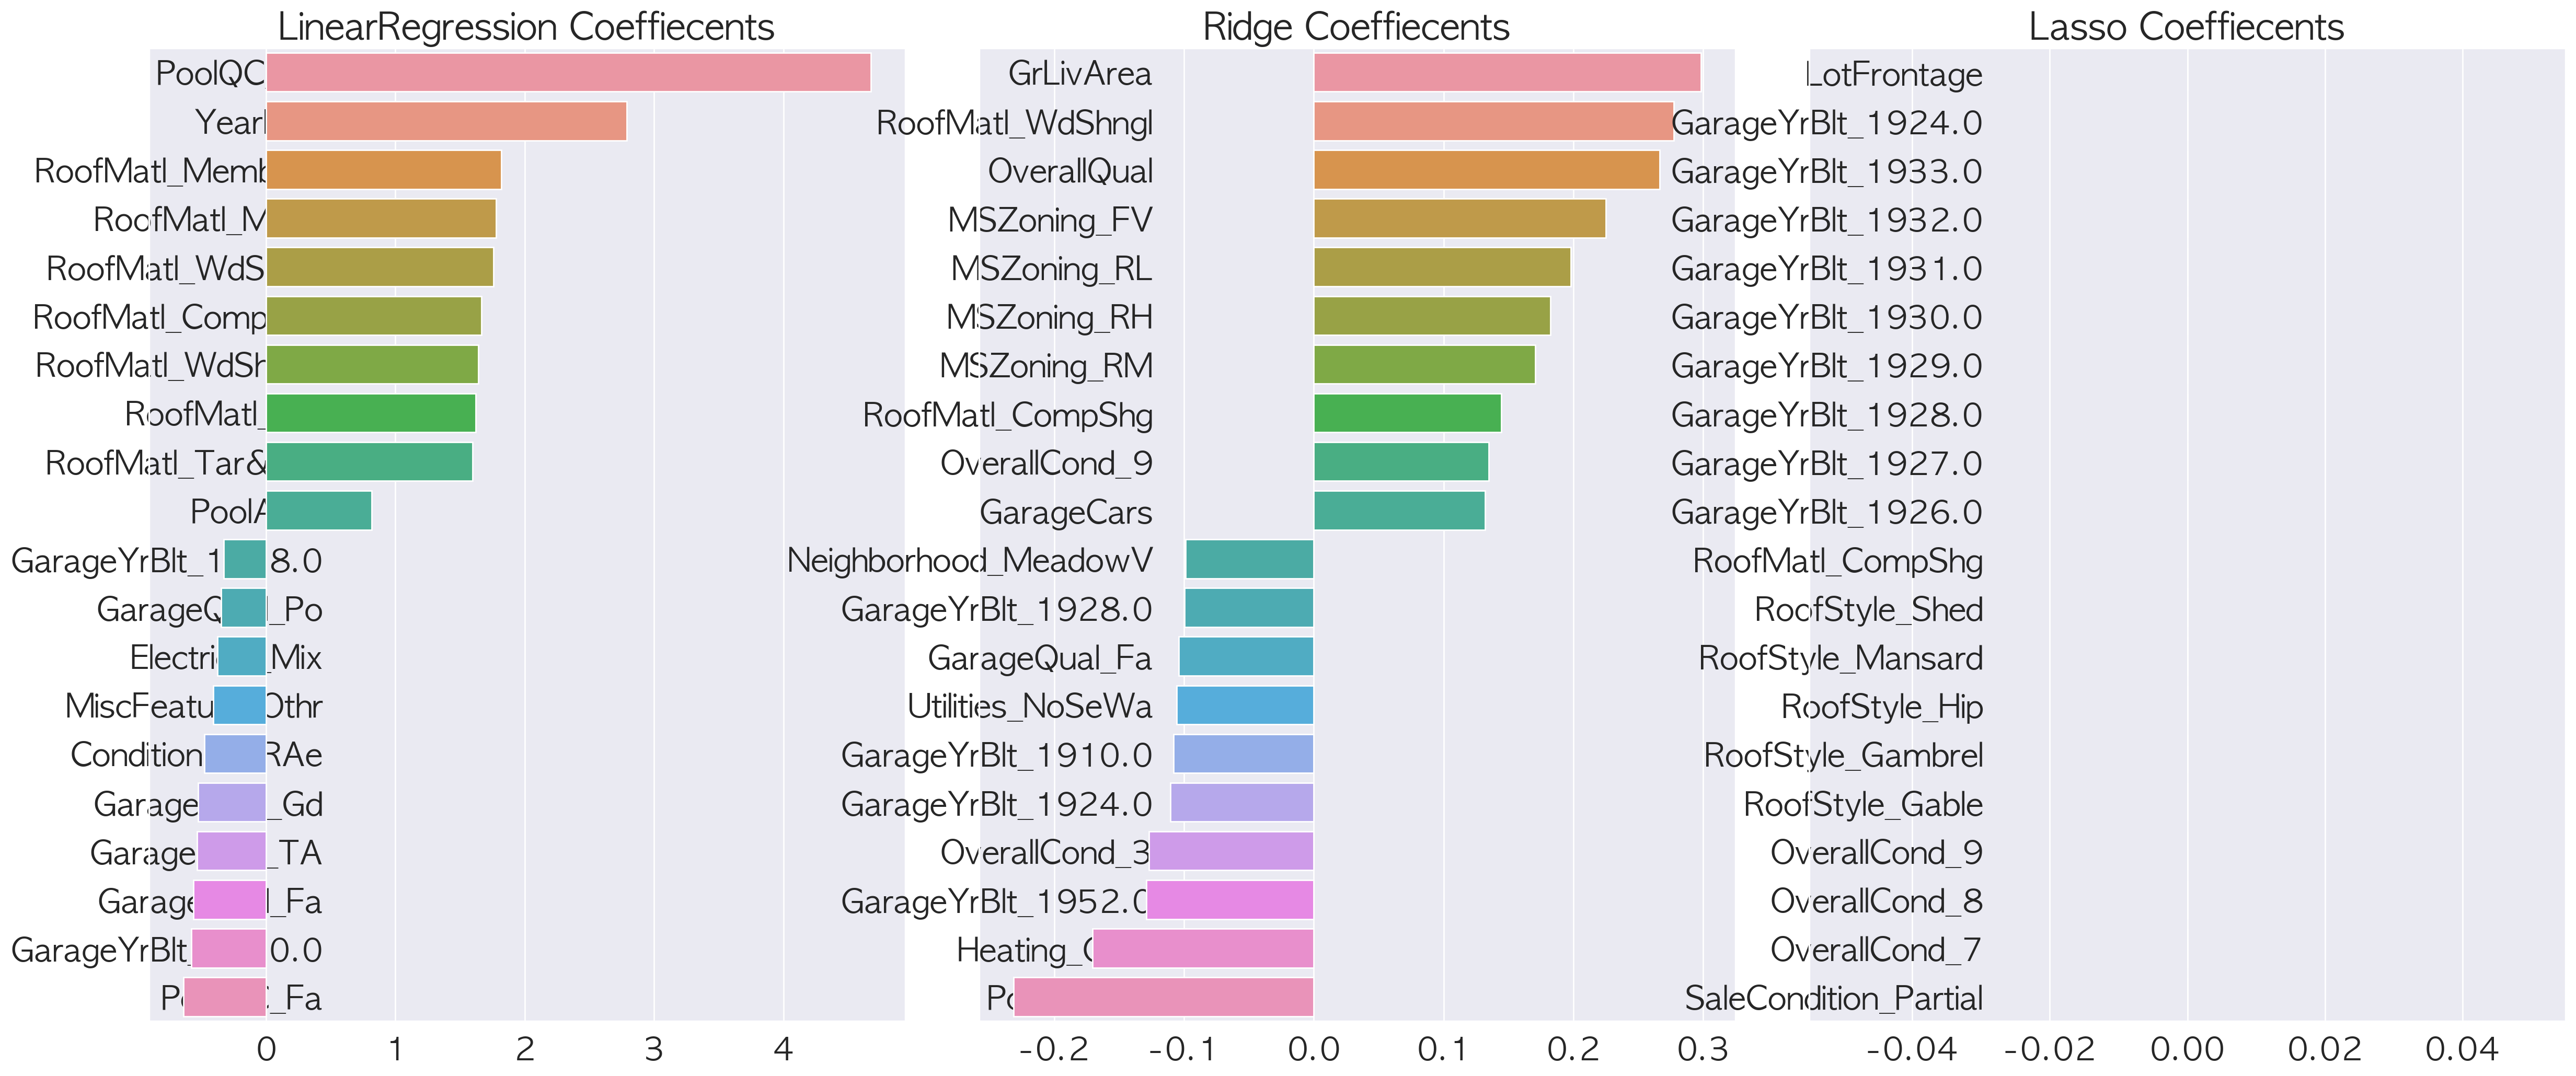

In [86]:
models = [lr, ridge, lasso]
visualize_coefficient(models)

In [87]:
# from sklearn.model_selection import cross_val_score

# def get_avg_rmse_cv(models):
#     for model in models:
#         # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
#         rmse_list = np.sqrt(-cross_val_score(model, X_features, y_log, scoring='neg_mean_squared_error', cv = 5))
#         rmse_avg = np.mean(rmse_list)
#         print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
#         print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# # 앞 예제에서 학습한 ridge_reg, lasso_reg 모델의 CV RMSE값 출력  
# models = [ridge, lasso]
# get_avg_rmse_cv(models)

In [88]:
# from sklearn.model_selection import GridSearchCV

# def print_best_params(model, params):
#     grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
#     grid_model.fit(X_features, y_log)
#     rmse = np.sqrt(-1* grid_model.best_score_)
#     print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
#     return grid_model.best_estimator_
 
# ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] } # L2: 모델이 큰 가중치를 학습하는 것을 방지하여 과적합을 줄이는 효과
# lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] } # L1: 가중치의 절대값 합에 페널티를 부과
# best_rige = print_best_params(ridge, ridge_params)
# best_lasso = print_best_params(lasso, lasso_params)


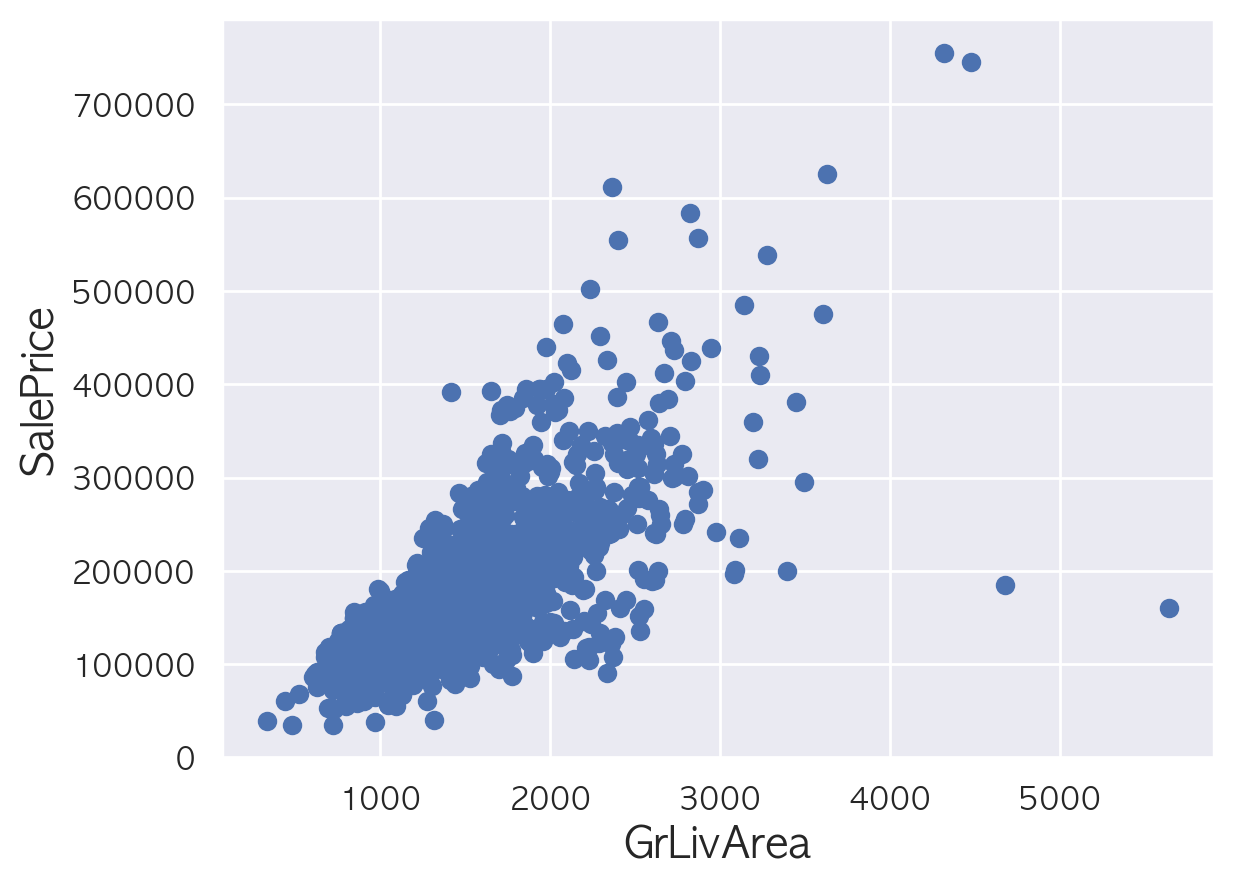

In [89]:
plt.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

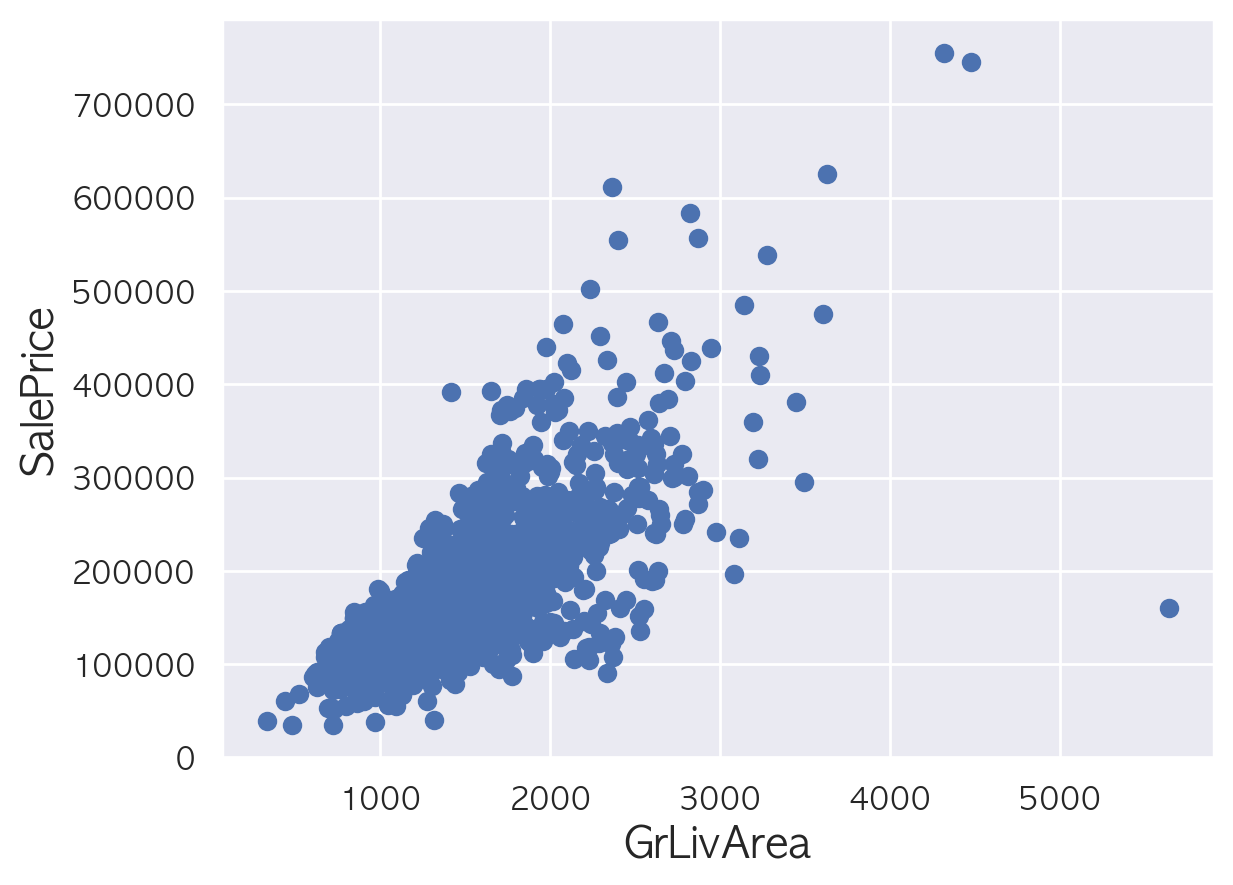

In [90]:
plt.scatter(x = expm1(train['GrLivArea']), y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

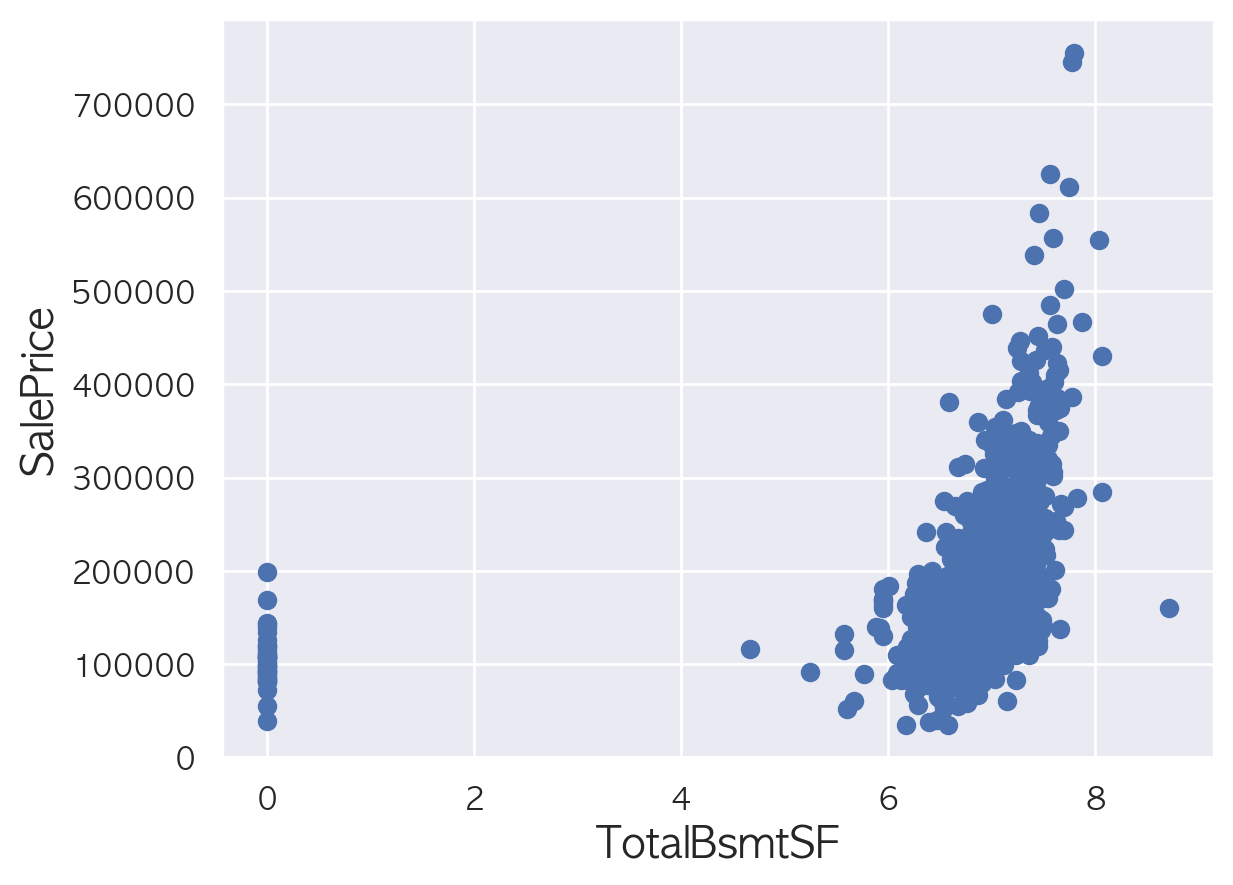

In [91]:
# TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.show()

In [92]:
train['total'] = train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['BsmtUnfSF']
train[['total', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']]

,total,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,11.578311,6.753438,6.561031,0.000000,5.017280
1,12.539021,7.141245,6.886532,0.000000,5.652489
2,12.263610,6.825460,6.188264,0.000000,6.075346
3,11.673317,6.629363,5.379897,0.000000,6.293419
4,12.682605,7.044033,6.486161,0.000000,6.196444
...,...,...,...,...,...
1455,6.860664,6.860664,0.000000,0.000000,6.860664
1456,18.153287,7.341484,6.673298,5.099866,6.380123
1457,12.398047,7.050123,5.620401,0.000000,6.777647
1458,10.849337,6.983790,3.912023,6.937314,0.000000


In [93]:
difference = train[train['TotalBsmtSF'] != train['total']]
difference
# 이상치라도 삭제 안 하기로 결정

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice,HasEnclosedPorch,hasfireplace,total
0,60,RL,4.189655,9.042040,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,2.197225,Typ,0.000000,No,Attchd,2003.0,RFn,1.098612,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,208500,1,0,11.578311
1,20,RL,4.394449,9.169623,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.945910,8,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,No,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,1.098612,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,No,No,No,2007,WD,Normal,181500,1,1,12.539021
2,60,RL,4.234107,9.328212,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,5,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,1.098612,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,223500,1,1,12.263610
3,70,RL,4.110874,9.164401,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,5,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,No,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,1.386294,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,No,No,No,2006,WD,Abnorml,140000,0,1,11.673317
4,60,RL,4.442651,9.565284,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,5,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,1.386294,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,No,No,No,2008,WD,Normal,250000,1,1,12.682605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,FV,4.143135,8.922792,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,2.079442,5,7.603399,7.603898,Gable,CompShg,VinylSd,VinylSd,No,0.000000,Gd,TA,PConc,Gd,TA,No,GLQ,6.018593,Unf,0.000000,6.699500,7.108244,GasA,Ex,Y,SBrkr,7.108244,0.000000,0.0,7.108244,0.693147,0.000000,1.098612,0.000000,1.098612,0.693147,Gd,1.945910,Typ,0.000000,No,Attchd,2004.0,RFn,1.098612,TA,TA,Y,0.000000,4.736198,0.000000,0.0,0.0,

In [94]:
train.drop(['total'], axis=1, inplace=True)

In [95]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성. 
cond1 = train_final['GrLivArea'] > np.log1p(4000)
cond2 = train_final['SalePrice'] < 500000
outlier_index = train_final[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', train_final.shape)
# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제. 
train_final.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', train_final.shape)

아웃라이어 레코드 index : [1298]
아웃라이어 삭제 전 house_df_ohe shape: (1454, 377)
아웃라이어 삭제 후 house_df_ohe shape: (1453, 377)


In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = train_final['SalePrice']

y_log = np.log1p(y_target)
X_features = train_final.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_log, test_size=0.2, random_state=156)

In [97]:
# from sklearn.model_selection import GridSearchCV

# def print_best_params(model, params):
#     grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
#     grid_model.fit(X_features, y_log)
#     rmse = np.sqrt(-1* grid_model.best_score_)
#     print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
#     return grid_model.best_estimator_
 
# ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] } # L2: 모델이 큰 가중치를 학습하는 것을 방지하여 과적합을 줄이는 효과
# lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] } # L1: 가중치의 절대값 합에 페널티를 부과
# best_rige = print_best_params(ridge, ridge_params)
# best_lasso = print_best_params(lasso, lasso_params)


In [98]:
# lr_reg = LinearRegression()
# lr_reg.fit(X_features, y_log)

# # ridge_reg = Ridge(alpha=10)
# ridge_reg = Ridge(alpha=8)
# ridge_reg.fit(X_features, y_log)

# lasso_reg = Lasso(alpha=0.001)
# lasso_reg.fit(X_features, y_log)


# # 모든 모델의 회귀 계수 시각화 
# models = [lr_reg, ridge_reg, lasso_reg]
# visualize_coefficient(models)

In [99]:
# predict = lasso_reg.predict(test_final)
# predict

In [100]:
# pred_final = expm1(predict)
# pred_final

In [101]:
sub = pd.read_csv('../../data/house_price/sample_submission.csv')

In [102]:
# sub['SalePrice'] = pred_final
# sub.to_csv('sample_submission.csv', index=False)

## randomforest

In [103]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [104]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)

In [105]:
%time
score = cross_val_score(model, X_features, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs
RMSLE: 0.010, RMSE: 0.129, MAE: 0.088
RMSLE: 0.012, RMSE: 0.155, MAE: 0.101
RMSLE: 0.013, RMSE: 0.163, MAE: 0.106
RMSLE: 0.009, RMSE: 0.119, MAE: 0.089
RMSLE: 0.010, RMSE: 0.133, MAE: 0.097
Score= 0.01089


In [106]:
model.fit(X_features, y_log)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [107]:
# 예측
predictions = model.predict(test_final)

print(predictions.shape)
predictions

(1459,)


array([11.74031542, 11.93200291, 12.10144179, ..., 11.95819337,
       11.62221577, 12.31512488])

In [108]:
from numpy import expm1

pred_final = expm1(predictions)
pred_final

array([125530.92945325, 152054.81154786, 180130.38726843, ...,
       156089.8313861 , 111547.61346308, 223043.12109454])

In [109]:
sub['SalePrice'] = pred_final
sub.to_csv('sample_submission.csv', index=False)

In [110]:
X_features

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,HasEnclosedPorch,hasfireplace,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,...,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,2.079442,7.602900,7.602900,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,1.098612,0.000000,4.127134,0.000000,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,4.394449,9.169623,1.945910,7.589336,7.589336,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,1.098612,5.700444,0.000000,0.000000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4.234107,9.328212,2.079442,7.601902,7.602401,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,1.098612,0.000000,3.761200,0.000000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4.110874,9.164401,2.079442,7.557995,7.586296,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2.079442,0.693147,1.386294,0.000000,3.583519,5.609472,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.442651,9.565284,2.197225,7.601402,7.601402,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,1.386294,5.262690,4.442651,0.000000,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0

In [111]:
# X_features, y_log

In [112]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

xgb = XGBRegressor(n_estimators=100, random_state=0, verbose=-1)

In [113]:
%time
X_features_np = X_features.values
y_log_np = y_log.values

score = cross_val_score(xgb, X_features_np, y_log_np, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))


CPU times: user 0 ns, sys: 1 μs, total: 1 μs
Wall time: 3.1 μs
RMSLE: 0.010, RMSE: 0.130, MAE: 0.091


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


RMSLE: 0.012, RMSE: 0.148, MAE: 0.099
RMSLE: 0.012, RMSE: 0.159, MAE: 0.104


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


RMSLE: 0.009, RMSE: 0.122, MAE: 0.091
RMSLE: 0.010, RMSE: 0.128, MAE: 0.093
Score= 0.01073


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [114]:
xgb.fit(X_features_np, y_log_np)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [22:43:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [115]:
test_final_np = test_final.values
predictions = xgb.predict(test_final_np)

# predictions = xgb.predict(test_final)

print(predictions.shape)
predictions

(1459,)


array([11.771105, 11.943229, 12.106835, ..., 12.019922, 11.648253,
       12.430818], dtype=float32)

In [116]:
pred_final = expm1(predictions)
pred_final

array([129456.09, 153771.38, 181104.56, ..., 166028.75, 114490.22,
       250399.67], dtype=float32)

In [117]:
sub['SalePrice'] = pred_final
sub.to_csv('sample_submission.csv', index=False)

In [118]:
y_target = train['SalePrice']

y_log_cat = np.log1p(y_target)
X_features_cat = train.drop('SalePrice', axis=1)

In [119]:
category_df = train.select_dtypes(include=['object', 'category']).columns
category_columns = category_df.tolist()

In [120]:
cat = CatBoostRegressor(n_estimators=1000, random_state=0, verbose=False, cat_features=category_columns)

In [121]:
%time
score = cross_val_score(cat, X_features_cat, y_log_cat, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.86 μs
RMSLE: 0.011, RMSE: 0.147, MAE: 0.092
RMSLE: 0.009, RMSE: 0.116, MAE: 0.076
RMSLE: 0.011, RMSE: 0.138, MAE: 0.092
RMSLE: 0.008, RMSE: 0.106, MAE: 0.076
RMSLE: 0.009, RMSE: 0.115, MAE: 0.083
Score= 0.00966


In [122]:
cat.fit(X_features_cat, y_log_cat)

In [123]:
predictions = cat.predict(test)

print(predictions.shape)
predictions

(1459,)


array([11.63601836, 11.98172244, 12.16308396, ..., 11.97891365,
       11.62701794, 12.318359  ])

In [124]:
pred_final = expm1(predictions)
pred_final

array([113097.94742118, 159806.05174983, 191583.44606218, ...,
       159357.81636028, 112084.57686452, 223765.64031645])

In [125]:
sub['SalePrice'] = pred_final
sub.to_csv('sample_submission.csv', index=False)

In [126]:
ss

NameError: name 'ss' is not defined

In [ ]:
y_target = train['SalePrice']

y_log_lgbm = np.log1p(y_target)
X_features_lgbm = train.drop('SalePrice', axis=1)

In [ ]:
category_df = train.select_dtypes(include=['object']).columns
category_columns = category_df.tolist()

train[category_columns] = train[category_df].apply(lambda col: col.astype('category'))
test[category_columns] = test[category_df].apply(lambda col: col.astype('category'))

In [ ]:
train

In [ ]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=500, random_state=0, verbose=0, categorical_feature=category_columns)

In [ ]:
%time
score = cross_val_score(lgb, X_features_lgbm, y_log_lgbm, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

In [ ]:
lgb.fit(X_features_lgbm, y_log_lgbm)

In [ ]:
predictions = lgb.predict(test)

print(predictions.shape)
predictions

In [ ]:
pred_final = expm1(predictions)
pred_final

In [ ]:
sub['SalePrice'] = pred_final
sub.to_csv('sample_submission.csv', index=False)

### 